# Importing necessary Libraries

In [ ]:
import nltk
import numpy as np
import pandas as pd
import random
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import feature_extraction, manifold
from nltk import FreqDist
import wordcloud


In [ ]:
%pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp


     |████████████████████████████████| 1.4MB 6.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:

#  download  gutenberg  and  punkit

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# **Cleanning and Preprocessing**

In [ ]:
def preprocessing_cleaning(  book_text , flg_stemm=False, flg_lemm=True   ):
  book_text = book_text.lower()                                # convert to lower case 
  tokenizer = RegexpTokenizer(r'\w+')                                         # remove Punctuation and special characters 
  tokens = tokenizer.tokenize(book_text)                                # Remove stop words 
  book_words = [w for w in tokens if not w in stopwords.words('english')]
  # return " ".join(filtered_words)
                                                    #                Stemming (remove -ing, -ly, ...)
  if flg_stemm == True:
      ps = nltk.stem.porter.PorterStemmer()
      book_words = [ps.stem(word) for word in book_words]
           
                                                      #                Lemmatisation (convert the word into root word)
  if flg_lemm == True:
      lem = nltk.stem.wordnet.WordNetLemmatizer()
      book_words = [lem.lemmatize(word) for word in book_words]

  return book_words 

# sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good. French-Fries"
# print ( preprocessing_cleaning(sentence)  )



# **Partitioning books** 
 

In [ ]:
def Partition_of_Books(  book_names , number_of_partitions  ,  number_of_words  ):

  book_partitions_list = [ ]     # list to save 200 partition for every book
  book_labels_list = [ ]         # list to save the label or book name for every partition
  for book in book_names:
    text = nltk.corpus.gutenberg.raw( book  )
    book_words = preprocessing_cleaning( text  )
    # tokenized_word =  nltk.word_tokenize(text)      # to split our text to words
    # text = nltk.Text( tokenized_word )
    # text = [word for word in text if not word in stopwords.words()]
 
    for x in range( number_of_partitions ):
      randoms  = np.random.randint( 0 ,  (len( book_words ) - number_of_words ) )  # to randomize the location where we get the partition
      partition_words = ( book_words[ randoms : randoms + number_of_words ] )   # save the partition
      partition_string = " ".join( partition_words )
      book_partitions_list.append( partition_string ) 
      book_labels_list.append( book )                       
                            # save the label
  return  book_partitions_list , book_labels_list


In [ ]:
     # Let's Check our Function

#  Let's pass Five books to our method

number_of_words = 100
number_of_partitions = 200

book_names = [ 'chesterton-thursday.txt' , 'edgeworth-parents.txt', 'melville-moby_dick.txt' , 'burgess-busterbrown.txt' , 'whitman-leaves.txt' ]
book_partitions_list , book_labels_list =  Partition_of_Books(  book_names ,  number_of_partitions  ,  number_of_words   )

print( len( book_labels_list  ) )
print( len(book_partitions_list) )



1000
1000


# **Converting to dataFrame**  

 


In [ ]:

# Let's use DataFrame to store our data   book_labels_list ,  book_partitions_list

df = pd.DataFrame(  [[ book_partition , book_label   ] for book_partition , book_label   in zip( book_partitions_list , book_labels_list )])

#  this is to export our csv file and save it on our machines  ( Serializatioin )
df.to_csv(  "F:\DEBI\My_file.csv"  )

# You can change this url to your url on your machine to save the csv file in your desktop



# **Visualizing our Data** 

## **Word Cloud:** is a data visualization chart that describes words which have the highest frequency in our dataset 

682


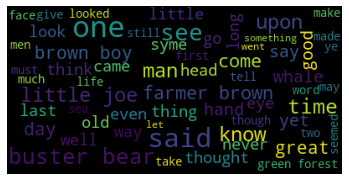

In [ ]:
print( len(book_partitions_list[3] ) )

wc = wordcloud.WordCloud( background_color='black',    max_words=60 ,     max_font_size=35  )
wc = wc.generate(str( book_partitions_list  ))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

## **Unigrams and Bigrams** is a data visualization diagram that helps us understand the most highest frequency in our dataset

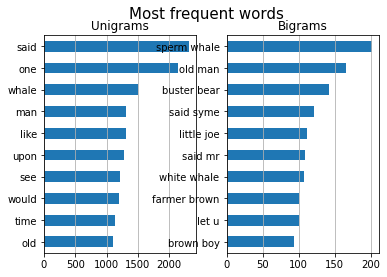

In [ ]:
top=10

def get_separate_words( book_names ):
  all_book_words = [ ]
  for book in book_names:
    text = nltk.corpus.gutenberg.raw( book  )
    words =  ( preprocessing_cleaning( text  )  )
    all_book_words.append(  words )

  all_words = [ ]
  for x in range( len( all_book_words  )  ):
    for y in range( len( all_book_words[x] ) ):
      all_words.append( all_book_words[x][y] )
  return all_words


# lst_tokens =   book_partitions_list[0]  
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(get_separate_words( book_names ))
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(get_separate_words( book_names ) , 2  ))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [ ]:
nltk.corpus.gutenberg.fileids()  

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(  book_partitions_list , book_labels_list  ,  test_size=0.3, random_state=42)

 print(     len( X_test )  ) 
 print( len ( y_test  )  )

 print( len( X_train ))
 print( len(y_train  ))

300
300
700
700


# **Bow and TF_IDF**

In [ ]:
def Bow_Tf_Idf(   book_partitions_list  ):


  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform( book_partitions_list )  # we calculated  bag of words to calculate the frequency of every word of the text.
  tfidf_transformer = TfidfTransformer()
  X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)   # we calculated the Term frequency (TF) and Inverse document Frequency (IDF)
  # X_train_tfidf.shape
  return  X_train_tfidf


# **N-gram**

In [ ]:
print( len( book_partitions_list  ))
tf_idf = Bow_Tf_Idf(  book_partitions_list )
print(   tf_idf.shape )   


def ngram(book_partitions_list , n ):
  count_vect = CountVectorizer(ngram_range=(1,n)   )
  X_train_counts = count_vect.fit_transform( book_partitions_list )
  tfidf_transformer = TfidfTransformer()
  X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
  return  X_train_tfidf

c=ngram( book_partitions_list, 2 )
print(c.shape )

1000
(1000, 11788)
(1000, 77329)


# **LDA** 

In [ ]:
def lda(book_partitions_list) :
  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform( book_partitions_list )
  LDA = LatentDirichletAllocation( n_components=7,random_state=42 )
  LDA.fit(X_train_counts)
  return LDA.transform(X_train_counts)

t=lda(book_partitions_list)
t.shape
   


(1000, 7)

In [ ]:
dd = Bow_Tf_Idf(   X_train  ) 
print(dd.shape )


(700, 10107)


In [ ]:



# tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
# X_train_tf = tf_transformer.transform(X_train_counts)
# X_train_tf.shape

# **Binarizing Target**

In [ ]:

book_names = [ 'chesterton-thursday.txt' , 'edgeworth-parents.txt', 'melville-moby_dick.txt' , 'burgess-busterbrown.txt' , 'whitman-leaves.txt' ]

def Binarizing_Target(   book_labels_list ):
  book_labels_list = np.array( book_labels_list ) 
  for book in book_names:
    book_labels_list [ book_labels_list  ==  book ]  = int( book_names.index( book  ) ) 
  # if type(book_labels_list[0] ) is str:
  return book_labels_list

 

In [ ]:
print(  book_names.index('chesterton-thursday.txt' ) )


0


# **Building Models (SVM, Decision Tree, k-Nearest Neighbor) with TF_IDF**  

In [ ]:
def Build_Models( x , y , model_str = "svm" ):
  model_str = str.lower( model_str )
  y = np.array(y)
  model = None
  if model_str == "svm":
    model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)  )    ,           ])
                                        #Training
    model.fit(    x   ,  y )
  elif model_str == "d_tree":
    model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)   ), ] )
                                    #   # fitting the data in the pipe
    model = model.fit( x   ,  y  )
 
  elif model_str == "knn":
    model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', KNeighborsClassifier(n_neighbors=7)   ),         ])
                                                   # Fitting our train data to the pipeline
    model.fit(  x  , y   ) 
  return model

 

# **Computing and Plotting Confusion Matrix**

In [ ]:

def compute_confusion_matrix( actual , predicted  ):
  arr = np.zeros( ( len( book_names) , len( book_names) )  )
  print( len( book_names)  )
  for x in range( len( actual ))  :
      arr[ actual[x] , predicted[x] ] += 1
  return np.int_( arr )


def plot_confusion_matrix(   confusion_matrix ,  classes ):
  df_cfm = pd.DataFrame( confusion_matrix , index = classes, columns = classes)
  plt.figure(figsize = (10,7))
  cfm_plot = sn.heatmap(df_cfm, annot=True)


 

In [ ]:
X_test_tfidf = Bow_Tf_Idf(  book_partitions_list  ) 

print(  X_test_tfidf.shape   ) 



(1000, 11788)


In [ ]:
print([int(x) for x in ['2','5','7']])

[2, 5, 7]


# **Evaluation of Models with TF_IDF**

In [ ]:
def Evaluate_Models(  X_train , y_train , X_test , y_test ):

  model_names = [  "svm"  , "d_tree"   ,     "knn"    ]
  acc=[]

  y_train_binarized = Binarizing_Target( y_train )
  y_test_binarized = Binarizing_Target( y_test )

  y_test_binarized =  [ int (i, base=16) for i in y_test_binarized ]

  #print( y_train_binarized )
  #print(  y_test_binarized )

  models = [ ] 
  for x in  range(len(model_names)) :
    models.append( Build_Models( X_train   , y_train_binarized  ,  model_names[x] )   ) 
    predicted = models[x].predict( X_test )
    predicted = [int(x) for x in predicted]
    acc.append(accuracy_score( y_test_binarized ,   predicted ) )
    print( "Accuuracy is     " ,  accuracy_score( y_test_binarized ,   predicted )  )
    confus_mtrix = confusion_matrix(  y_test_binarized ,   predicted )
    print( "Confusion Matrix    \n" , confus_mtrix   ) 
    # plot_confusion_matrix( model  ,   np.array ( partition_test ) ,   np.array( predicted ) )
    # print(  book_names [  int(predicted[0] )  ]  )
    # np.mean( predicted == book_names_bin  )
    plot_confusion_matrix(  confusion_matrix(   y_test_binarized , predicted )  , book_names )
    # print(    compute_confusion_matrix(   y_test_binarized , predicted ) )

    
  print( "Highest Accuracy Model is : " +   model_names [ np.argmax(acc) ] )


Accuuracy is      0.9966666666666667
Confusion Matrix    
 [[54  0  0  0  1]
 [ 0 71  0  0  0]
 [ 0  0 57  0  0]
 [ 0  0  0 53  0]
 [ 0  0  0  0 64]]
Accuuracy is      0.62
Confusion Matrix    
 [[44  0  0  0 11]
 [ 0  0  0  0 71]
 [ 0  0 30  0 27]
 [ 0  0  0 48  5]
 [ 0  0  0  0 64]]
Accuuracy is      0.9533333333333334
Confusion Matrix    
 [[54  0  0  0  1]
 [ 0 68  0  3  0]
 [ 0  0 53  1  3]
 [ 0  0  0 53  0]
 [ 2  2  1  1 58]]
Highest Accuracy Model is : svm


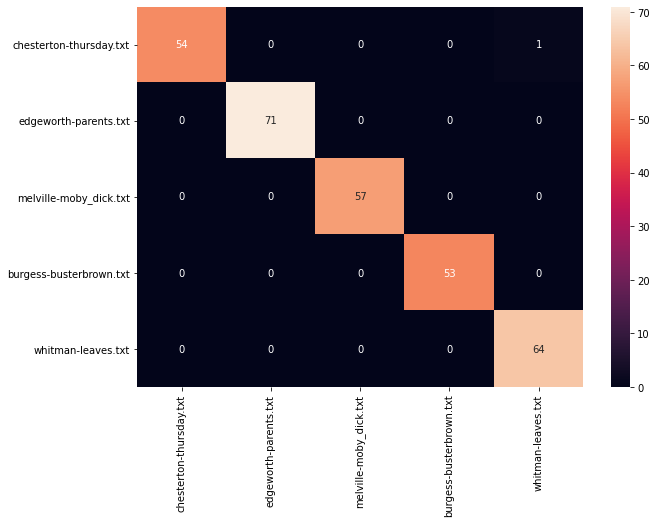

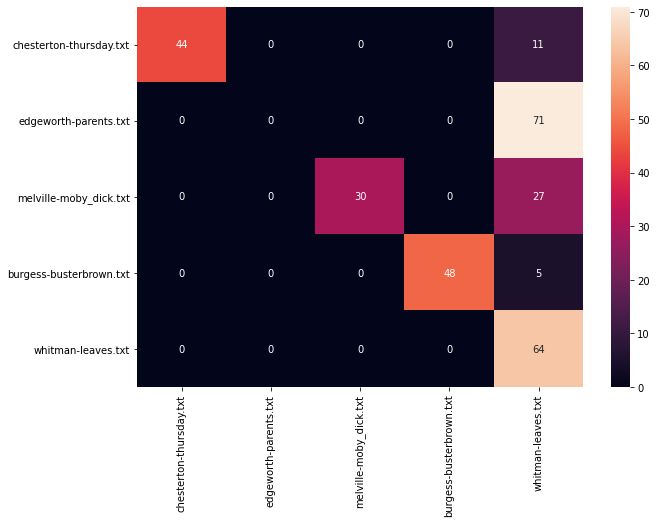

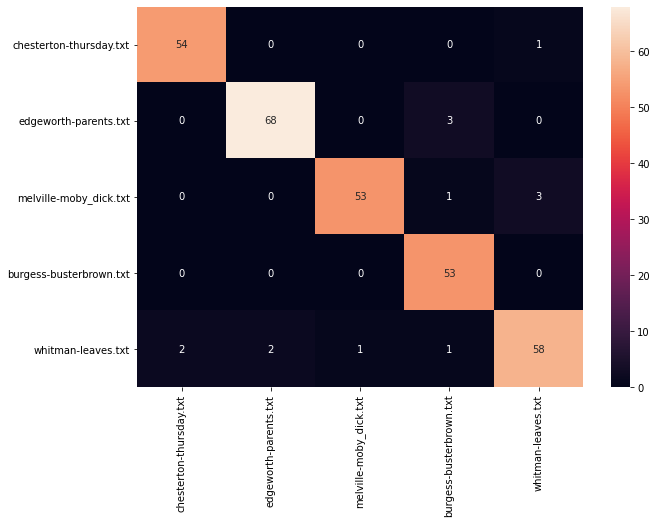

In [ ]:
Evaluate_Models(  X_train , y_train , X_test , y_test  )

# **Evaluation 10-Fold for (SVM , D_Tree ,  KNN ) with           TF_IDF**

In [ ]:
# Models        

svm = SGDClassifier(loss='hinge', penalty='l2',  alpha=1e-3, random_state=42,  max_iter=5, tol=None)
d_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
knn = KNeighborsClassifier(n_neighbors=7)

X_train_tfidf  =  Bow_Tf_Idf(  book_partitions_list )
 
models = [  svm   , d_tree ,  knn  ]
model_names = [ "Support Vector Machine" , "Decision Tree"  ,  "K Nearest Neighbor" ]
Model_scores = [ ]
All_Model_scores_list = [ ] 

Model_accuracy = [ ] 
Model_std = [ ] 

Models_highest_accuracy = [ ]
Models_Less_std = [ ] 
Model_index = [ ]

for x in range( 3 ):
  Model_scores.append ( cross_val_score(  models[x] ,    X_train_tfidf ,  book_labels_list ,   cv = 10, scoring= 'accuracy')  ) 
 
for x in range( len( Model_scores ) ) :

  print(       model_names[ x ]  ,   " Scores is  "  , Model_scores[ x ]  )
  print("Accuracy:   ",  (  Model_scores[ x ].mean()  ,   Model_scores[ x ].std()  )   )
  print( "/////////////////////////////////////////// \n ")
  All_Model_scores_list.append(  Model_scores[ x ] )
  Model_accuracy.append(  Model_scores[ x ].mean()   )
  Model_std.append(     Model_scores[ x ].std()  )


print (  "Champion Model is : " , model_names[ np.argmax( Model_accuracy )  ]  )

print( Model_accuracy )
print( Model_std ) 

Models_highest_accuracy.append(  np.max( Model_accuracy)  )
Models_Less_std.append( np.min( Model_std ) )
Model_index.append(  np.argmax( Model_accuracy )   )

print( All_Model_scores_list )



Support Vector Machine  Scores is   [0.98 0.96 0.86 0.96 0.96 0.94 0.96 0.92 0.98 0.94]
Accuracy:    (0.946, 0.033526109228480414)
/////////////////////////////////////////// 
 
Decision Tree  Scores is   [0.46 0.68 0.56 0.54 0.68 0.66 0.6  0.54 0.56 0.6 ]
Accuracy:    (0.5880000000000001, 0.06705221845696084)
/////////////////////////////////////////// 
 
K Nearest Neighbor  Scores is   [0.82 0.82 0.82 0.82 0.86 0.8  0.82 0.8  0.84 0.78]
Accuracy:    (0.818, 0.02088061301782108)
/////////////////////////////////////////// 
 
Champion Model is :  Support Vector Machine
[0.946, 0.5880000000000001, 0.818]
[0.033526109228480414, 0.06705221845696084, 0.02088061301782108]
[array([0.98, 0.96, 0.86, 0.96, 0.96, 0.94, 0.96, 0.92, 0.98, 0.94]), array([0.46, 0.68, 0.56, 0.54, 0.68, 0.66, 0.6 , 0.54, 0.56, 0.6 ]), array([0.82, 0.82, 0.82, 0.82, 0.86, 0.8 , 0.82, 0.8 , 0.84, 0.78])]


([<matplotlib.axis.XTick at 0x7f1c78311b10>,
 [Text(0, 0, 'Support Vector Machine'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'K Nearest Neighbor')])

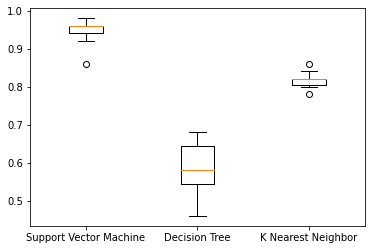

In [ ]:
All_Model_scores_list = np.array( All_Model_scores_list  )
plt.boxplot(   All_Model_scores_list.transpose()   )
ticks = range( 1 , len( model_names)+1 )
plt.xticks(  ticks ,  model_names )


# **Evaluation 10-Fold for (SVM , D_Tree ,  KNN) with          N-Grams**

In [ ]:
# Models        

svm = SGDClassifier(loss='hinge', penalty='l2',  alpha=1e-3, random_state=42,  max_iter=5, tol=None)
d_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
knn = KNeighborsClassifier(n_neighbors=7)

X_train_ngram  =  ngram(  book_partitions_list  , 40 )
 
models = [  svm   , d_tree ,  knn  ]
model_names = [ "Support Vector Machine" , "Decision Tree"  ,  "K Nearest Neighbor" ]
Model_scores = [ ]
All_Model_scores_list = [ ] 



Model_accuracy = [ ] 
Model_std = [ ] 

 
for x in range( 3 ):
  Model_scores.append ( cross_val_score(  models[x] ,    X_train_ngram ,  book_labels_list ,   cv = 10, scoring= 'accuracy')  ) 
 
for x in range( len( Model_scores ) ) :

  print(       model_names[ x ]  ,   " Scores is  "  , Model_scores[ x ]  )
  print("Accuracy: " ,  (  Model_scores[ x ].mean()  ,   Model_scores[ x ].std() )  )
  print( "/////////////////////////////////////////// \n ")
  All_Model_scores_list.append( Model_scores[x] )
  Model_accuracy.append(  Model_scores[ x ].mean()   )
  Model_std.append(   Model_scores[ x ].std()  )
  

print( Model_accuracy )
print( Model_std  )
print (  "Champion Model is : " , model_names[ np.argmax( Model_accuracy )  ]  )


Models_highest_accuracy.append(  np.max( Model_accuracy)  )
Models_Less_std.append( np.min( Model_std ) )
Model_index.append(  np.argmax( Model_accuracy )   )


Support Vector Machine  Scores is   [0.86 0.92 0.86 0.9  0.9  0.94 0.88 0.9  0.9  0.84]
Accuracy:  (0.89, 0.028635642126552712)
/////////////////////////////////////////// 
 
Decision Tree  Scores is   [0.46 0.68 0.56 0.54 0.68 0.66 0.6  0.54 0.56 0.6 ]
Accuracy:  (0.5880000000000001, 0.06705221845696084)
/////////////////////////////////////////// 
 
K Nearest Neighbor  Scores is   [0.88 0.86 0.84 0.84 0.9  0.8  0.82 0.84 0.82 0.88]
Accuracy:  (0.8480000000000001, 0.029933259094191537)
/////////////////////////////////////////// 
 
[0.89, 0.5880000000000001, 0.8480000000000001]
[0.028635642126552712, 0.06705221845696084, 0.029933259094191537]
Champion Model is :  Support Vector Machine


([<matplotlib.axis.XTick at 0x7f1c5c82d2d0>,
 [Text(0, 0, 'Support Vector Machine'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'K Nearest Neighbor')])

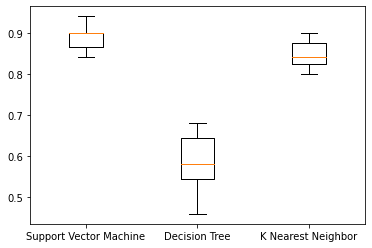

In [ ]:
All_Model_scores_list = np.array( All_Model_scores_list  )
plt.boxplot(   All_Model_scores_list.transpose()   )
ticks = range( 1 , len( model_names)+1 )
plt.xticks(  ticks ,  model_names )


# **Evaluation 10-Fold for (SVM , D_Tree ,  KNN) with           LDA**

In [ ]:

# Models        

svm = SGDClassifier(loss='hinge', penalty='l2',  alpha=1e-3, random_state=42,  max_iter=5, tol=None)
d_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
knn = KNeighborsClassifier(n_neighbors=7)

X_train_lda  =  lda(  book_partitions_list )
 
models = [  svm   , d_tree ,  knn  ]
model_names = [ "Support Vector Machine" , "Decision Tree"  ,  "K Nearest Neighbor" ]
Model_scores = [ ]
All_Model_scores_list = [ ] 


Model_accuracy = [ ] 
Model_std = [ ] 



for x in range( 3 ):
  Model_scores.append ( cross_val_score(  models[x] ,    X_train_lda ,  book_labels_list ,   cv = 10, scoring= 'accuracy')  ) 
 

for x in range( len( Model_scores ) ) :

  print(       model_names[ x ]  ,   " Scores is  "  , Model_scores[ x ]  )
  print("Accuracy: " , (  Model_scores[ x ].mean()  ,   Model_scores[ x ].std() )   )
  print( "/////////////////////////////////////////// \n ")
  All_Model_scores_list.append(  Model_scores[x] ) 
  Model_accuracy.append(  Model_scores[ x ].mean()   )
  Model_std.append(    Model_scores[ x ].std()   )  



print (  "Champion Model is : " , model_names[ np.argmax( Model_accuracy )  ]  )

print(Model_accuracy )
print( Model_std )
Models_highest_accuracy.append(  np.max( Model_accuracy)  )
Models_Less_std.append( np.min( Model_std ) )
Model_index.append(  np.argmax( Model_accuracy )   )


Support Vector Machine  Scores is   [0.28 0.24 0.38 0.2  0.24 0.18 0.14 0.18 0.24 0.3 ]
Accuracy:  (0.238, 0.066)
/////////////////////////////////////////// 
 
Decision Tree  Scores is   [0.38 0.44 0.42 0.36 0.5  0.4  0.28 0.5  0.4  0.32]
Accuracy:  (0.4, 0.06693280212272604)
/////////////////////////////////////////// 
 
K Nearest Neighbor  Scores is   [0.4  0.36 0.38 0.4  0.5  0.42 0.28 0.42 0.46 0.4 ]
Accuracy:  (0.402, 0.055461698495448186)
/////////////////////////////////////////// 
 
Champion Model is :  K Nearest Neighbor
[0.238, 0.4, 0.402]
[0.066, 0.06693280212272604, 0.055461698495448186]


([<matplotlib.axis.XTick at 0x7f1c7886ee10>,
 [Text(0, 0, 'Support Vector Machine'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'K Nearest Neighbor')])

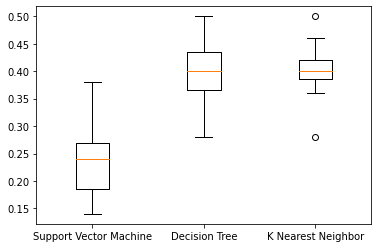

In [ ]:
All_Model_scores_list = np.array( All_Model_scores_list  )
plt.boxplot(   All_Model_scores_list.transpose()   )
ticks = range( 1 , len( model_names)+1 )
plt.xticks(  ticks ,  model_names )


# **Error Analysis**
So After running K-Fold on SVM , KNN  , Decision Tree. We find that the highest mean accuracy is the Support Vector Machine. So, we consider the SVM as the champion Model. 

Accuracy is      0.9966666666666667
Confusion Matrix    
 [[54  0  0  0  1]
 [ 0 71  0  0  0]
 [ 0  0 57  0  0]
 [ 0  0  0 53  0]
 [ 0  0  0  0 64]]


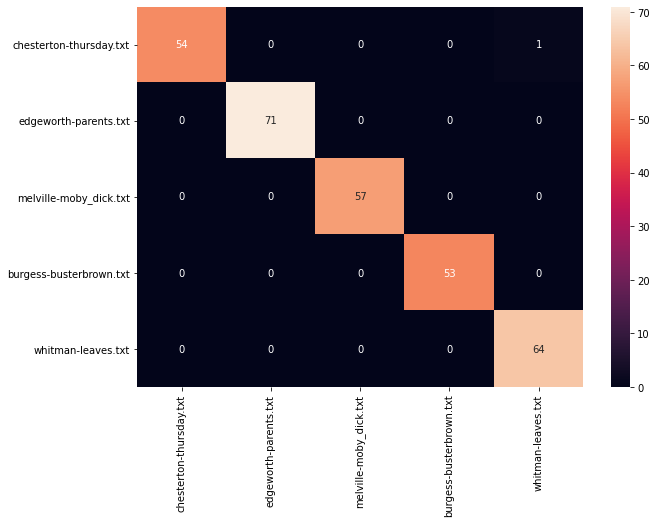

In [ ]:


y_train_binarized = Binarizing_Target( y_train )
y_test_binarized = Binarizing_Target( y_test )

y_train_binarized =  [ int (i ) for i in y_train_binarized ]
y_test_binarized =  [ int (i ) for i in y_test_binarized ]
 


model = ( Build_Models( X_train   , y_train_binarized  ,  "svm" )   ) 

predicted = model.predict( X_test)
predicted = [int(x) for x in predicted]
accuracy_scores = accuracy_score( y_test_binarized ,   predicted ) 
print( "Accuracy is     " ,  accuracy_score( y_test_binarized ,   predicted )  )
confus_mtrix = confusion_matrix(  y_test_binarized ,   predicted )
print( "Confusion Matrix    \n" , confus_mtrix   ) 


plot_confusion_matrix(  confusion_matrix(   y_test_binarized , predicted )  , book_names )
# print(    compute_confusion_matrix(   y_test_binarized , predicted ) )

In [ ]:
error_partition =  [ ]
error_books = [ ] 
def detect_misclassified( actual , predicted  ):


  print( len( actual ) ) 
  print( len( predicted ) ) 
  error_partition = [ ]
  for x in range( len( actual ))  :
    if(   actual[x] !=  predicted[x] ):

      print( "Misclassified = " ,  book_names[ int( predicted[x] ) ]   )
      print( "Correct Classified = " , book_names[ actual[x] ]  )   

      error_books.append(  book_names[ int( predicted[x] ) ]  )
      error_partition.append( book_partitions_list[x] ) 

  print( "Error Partitions is :  \n" ,  book_partitions_list  )
  print( "Partitions Number is  " , len( error_partition) )
  return error_partition , error_books

error_partition ,  error_books = detect_misclassified(  y_test_binarized ,   predicted   )

print( error_books)

300
300
Misclassified =  whitman-leaves.txt
Correct Classified =  chesterton-thursday.txt
Error Partitions is :  
 ['inside herring run mile let secretary smile herring try fly let secretary die rustic proverb eternal crikey began secretary let man people commonly come exhibition riding mad elephant look shouted syme suddenly look look asked secretary savagely look captive balloon said syme pointed frenzy blaze look captive balloon demanded secretary queer captive balloon nothing said syme except captive turned eye balloon swung swelled exhibition string like child balloon second afterwards string came two car balloon broken loose floated away freedom soap bubble ten thousand devil shrieked secretary got shook fist sky balloon borne chance wind came right could see great', 'pause lip clay parted said automatic lifeless distinctness damnable hypocrite syme looked straight frightful eye pale blue one said dignity comrade gregory accuses hypocrisy know well keeping engagement nothing duty

## **Analyizing error partitions by drawing the word cloud**

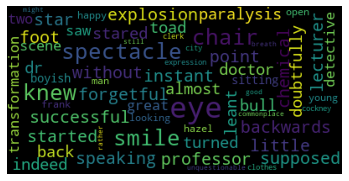

In [ ]:
if ( len( error_partition ) != 0 ):

  wc = wordcloud.WordCloud( background_color='black',    max_words=60 ,     max_font_size=35  )  # Here we computed the word cloud for the wrong partitions to know more about the highest frequency words 
  wc = wc.generate(str( error_partition  ))
  fig = plt.figure(num=1)
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show(    )



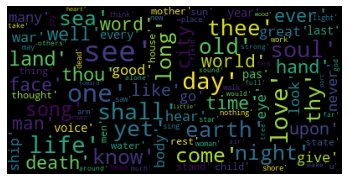

In [ ]:
if ( len( error_partition ) != 0 ):

  all_error_books = [ ]
  for x in range( len( error_books) ):            # Here we want to know more about the word frequeny in the wrong books that the algorithm has misclassified the partitions to them 

    text = nltk.corpus.gutenberg.raw( error_books[x]  )
    book_words = preprocessing_cleaning( text  )  
    all_error_books.append( book_words )


  wc = wordcloud.WordCloud( background_color='black',    max_words=100 ,     max_font_size=35  )
  wc = wc.generate(str( all_error_books  ))
  fig = plt.figure(num=1)
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()
                                            #            we found that there are many words in the wrong partitions are similar to the words existed in the wrong books so the algorithm classified them to the wrong books. 

# **Predicting Book**

In [ ]:
y=[]
authers=['G. K. Chesterton','Richard Lovell Edgeworth','Herman Melville','Thornton Burgess','Walt Whitman']

x="So Farmer Brown's boy made his lunch on blueberries and then rather sheepishly he started for home to tell of all the strange things that "
x=preprocessing_cleaning(  x , flg_stemm=False, flg_lemm=True   )
y.append(" ".join(x))

predicted = model.predict(y)
print("the predicted book is " , book_names[int(predicted)],"  the auther is : ",authers[int(predicted)] )



the predicted book is  burgess-busterbrown.txt   the auther is :  Thornton Burgess


# **Bias & Variability**
If the average prediction values are significantly different from the true value based on the sample data, the model has a high level of bias.

## **bias**
is the amount that a model’s prediction differs from the target value, compared to the training data.

## **Variance**
indicates how much the estimate of the target function will alter if different training data were used.

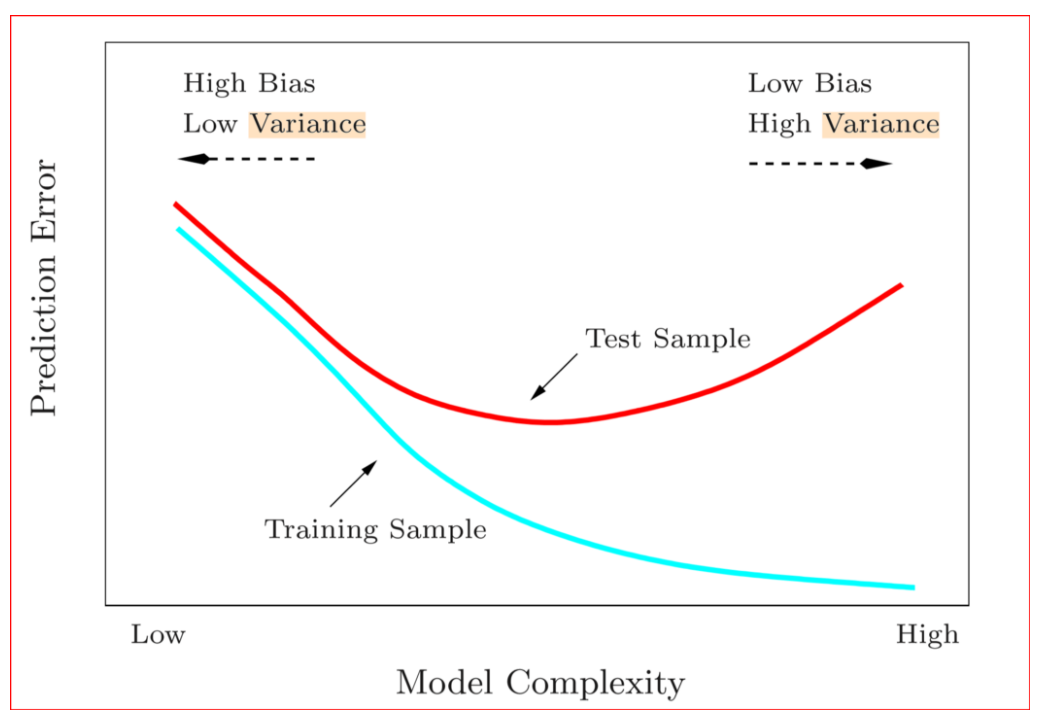

In [ ]:
# Here we consider the highest accuracy as   >>>   the lowest bias 
# and the Lowest standard deviation as       >>>   the Lowest Variance 


Models_highest_accuracy 
Models_Less_std 
Model_index

print(   Models_highest_accuracy)
print(Models_Less_std )

Highest_accuracy_index = np.argmax(  Models_highest_accuracy  )
Lowest_std = np.min( Models_Less_std )


print( "Lowest Bias is               >>>>>>>>>    "  , np.max(  Models_highest_accuracy ) )
print( "Lowest Standard deviation is >>>>>>>>>    " ,  np.min(  Models_Less_std ) )

print( model_names[ Model_index[ Highest_accuracy_index  ]  ] )


[0.991, 0.9800000000000001, 0.632]
[0.007000000000000006, 0.008944271909999166, 0.036823905279043945]
Lowest Bias is               >>>>>>>>>     0.991
Lowest Standard deviation is >>>>>>>>>     0.007000000000000006
Support Vector Machine


# **Identifying, measuring and control the machine’s thresholds of factors of prediction hardship**

## **Increasing the Number of Partitions and Words**

In [ ]:

# set number_of_partitions per book = 400  partitions
# set number_of_words per partition = 200  words
number_of_partitions = 400 
number_of_words = 200
book_partitions_list , book_labels_list =  Partition_of_Books(  book_names ,  number_of_partitions  ,  number_of_words   )

# print( len( book_partitions_list  ) )
# print( len(  book_labels_list ) )

# so here when we increased the number of partitions and the number of books we found that the accuracy has increased 



Accuuracy is      0.9983333333333333
Confusion Matrix    
 [[121   0   0   0   0]
 [  0 127   0   0   0]
 [  0   0 103   0   0]
 [  0   0   0 119   0]
 [  0   0   1   0 129]]
Accuuracy is      0.71
Confusion Matrix    
 [[114   7   0   0   0]
 [  0 127   0   0   0]
 [  0  30  73   0   0]
 [  0   7   0 112   0]
 [  0 126   4   0   0]]
Accuuracy is      0.99
Confusion Matrix    
 [[120   0   0   0   1]
 [  0 127   0   0   0]
 [  0   0 102   0   1]
 [  0   0   0 119   0]
 [  1   0   2   1 126]]
Highest Accuracy Model is : svm


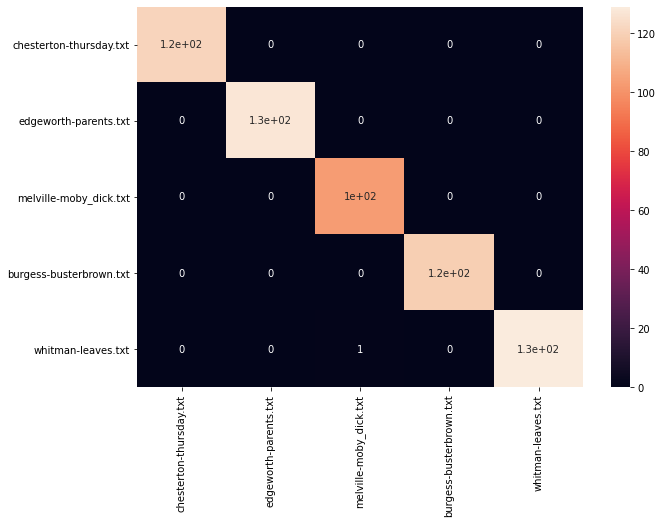

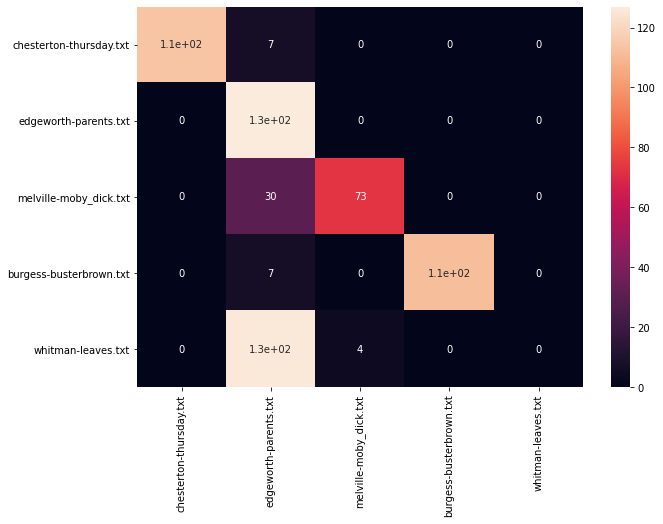

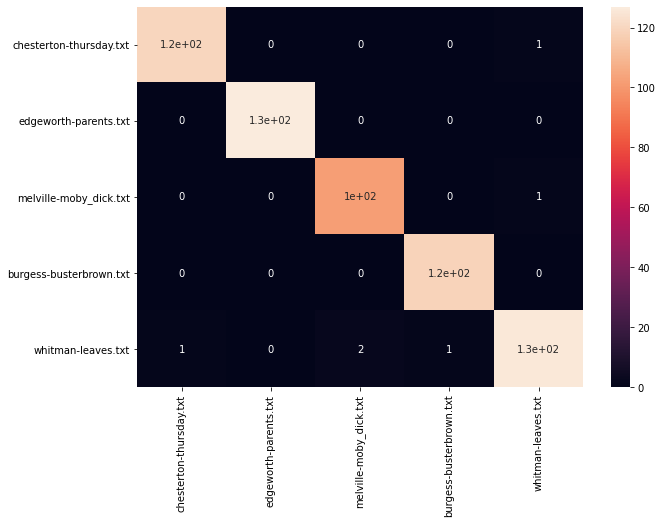

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(  book_partitions_list , book_labels_list  ,  test_size=0.3, random_state=42)

Evaluate_Models(  X_train,   y_train, X_test, y_test )

## **Decreasing the Number of Partitions and Words** 

In [ ]:

# set number_of_partitions per book = 100  partitions
# set number_of_words per partition = 50  words
number_of_partitions = 100 
number_of_words = 50
book_partitions_list , book_labels_list =  Partition_of_Books(  book_names ,  number_of_partitions  ,  number_of_words   )

# print( len( book_partitions_list  ) )
# print( len(  book_labels_list ) )

# so here when we decreased the number of partitions and the number of books we found that the accuracy has dramatically decreased because the features has decreased  



Accuuracy is      0.9333333333333333
Confusion Matrix    
 [[37  1  0  0  1]
 [ 0 23  0  0  0]
 [ 1  3 19  0  3]
 [ 0  0  0 31  0]
 [ 0  1  0  0 30]]
Accuuracy is      0.5066666666666667
Confusion Matrix    
 [[20  4 15  0  0]
 [ 0 14  9  0  0]
 [ 0  4 22  0  0]
 [ 0  2  9 20  0]
 [ 0  0 31  0  0]]
Accuuracy is      0.8
Confusion Matrix    
 [[36  0  1  1  1]
 [ 1 19  0  3  0]
 [ 4  2 16  1  3]
 [ 0  0  0 31  0]
 [ 8  4  0  1 18]]
Highest Accuracy Model is : svm


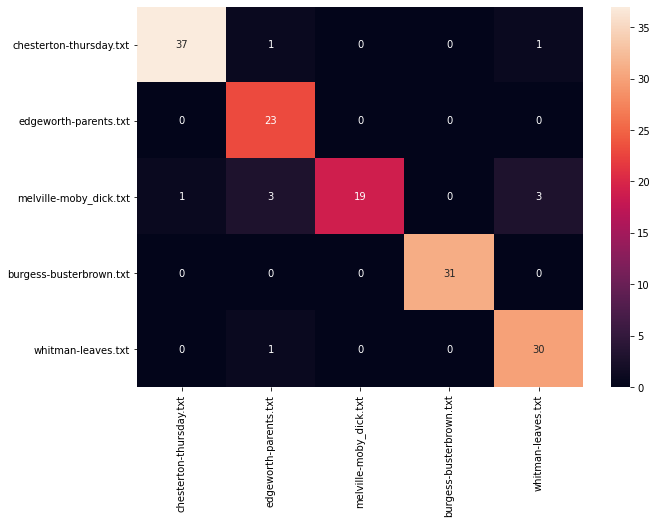

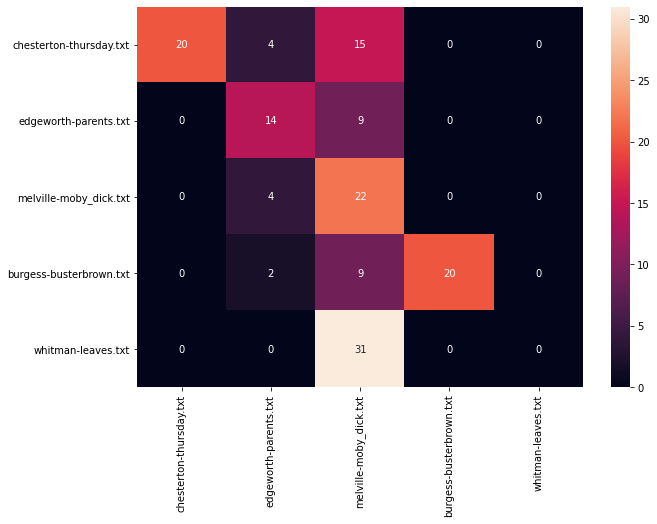

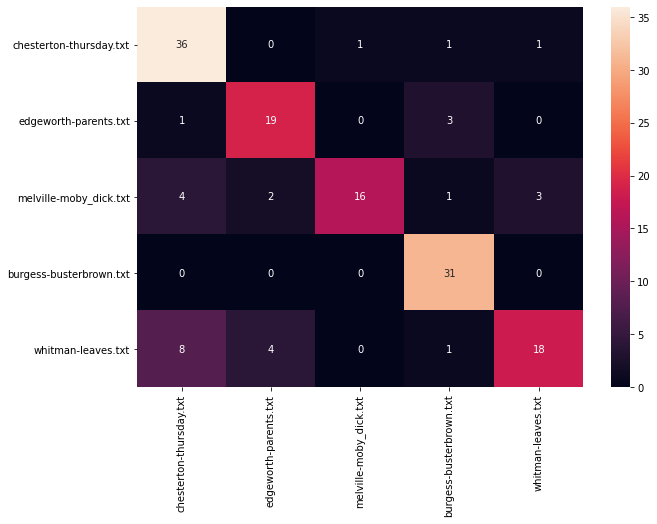

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(  book_partitions_list , book_labels_list  ,  test_size=0.3, random_state=42)

Evaluate_Models(  X_train,   y_train, X_test, y_test )